# Data preprocessing

In [2]:
import pandas as pd

df = pd.read_csv ("Downloads/Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dropping some columns

In [8]:
new_data = df.drop(columns=['Ticket', 'PassengerId'])
new_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Replacing missing numerical value(Age)

In [9]:
new_data["Age"].fillna(new_data["Age"].mode(),inplace=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Replacing missing categorical values(Cabin)

In [10]:
new_data["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
D              3
              ..
B38            1
D37            1
D11            1
E10            1
B41            1
Name: Cabin, Length: 147, dtype: int64

In [11]:
new_data["Cabin"].fillna("G6" , inplace = True)
new_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,G6,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,G6,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,G6,Q


### replace some categorical data by number

In [12]:
new_data['Sex'] = new_data['Sex'].replace({'male':1, 'female':0})
new_data['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [13]:
new_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
new_data['Embarked'] = new_data['Embarked'].map({'C':0, 'Q':1, 'S':2})
new_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,G6,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,G6,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,G6,2.0


# Visualization phase:

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='survivre', ylabel='number of person'>

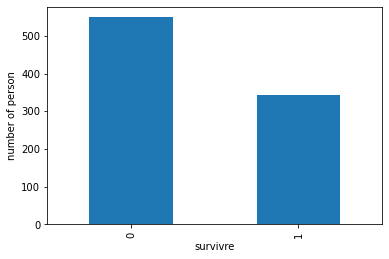

In [16]:
plt.xlabel("survivre")
plt.ylabel("number of person")
vc = new_data['Survived'].value_counts()
vc.plot.bar()
# the number of death is more than number of survivre

<AxesSubplot:title={'center':'Histogram of diffrent ages'}, xlabel='Age', ylabel='Frequency'>

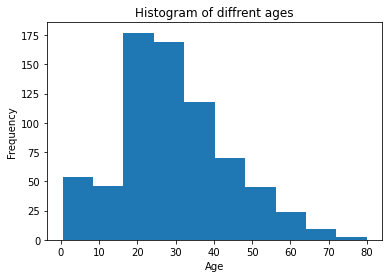

In [17]:
plt.title("Histogram of diffrent ages")
plt.xlabel("Age")
plt.ylabel("frequency")
new_data["Age"].plot.hist()
# Ages between 20 and 30 are quite frequent.

<AxesSubplot:xlabel='Sex', ylabel='Passenger count'>

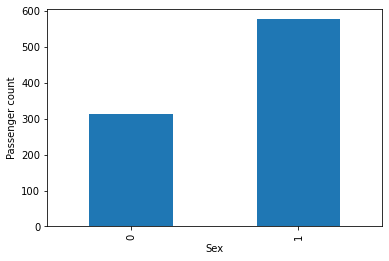

In [18]:
plt.xlabel('Sex')
plt.ylabel('Passenger count')
vc1  = new_data["Sex"].value_counts().sort_index()
vc1.plot.bar()
# the number of male is more than female

In [19]:
 new_data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
0,0.742038
1,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survival Probability'>

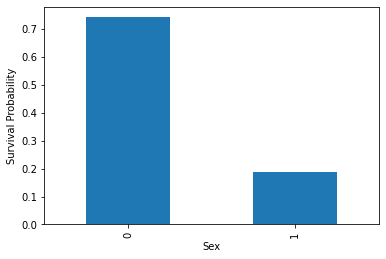

In [20]:
plt.xlabel('Sex')
plt.ylabel('Survival Probability')
vc2 = new_data[['Sex', 'Survived']].groupby('Sex').mean()
vc2.Survived.plot.bar()

<AxesSubplot:xlabel='Embarked', ylabel='Passenger count'>

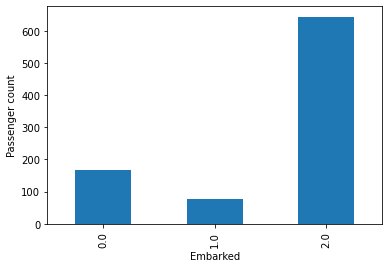

In [21]:
plt.xlabel('Embarked')
plt.ylabel('Passenger count')
vc3 = new_data["Embarked"].value_counts().sort_index()
vc3.plot.bar()

### correlation between Sex and Age

In [22]:
import seaborn as sns

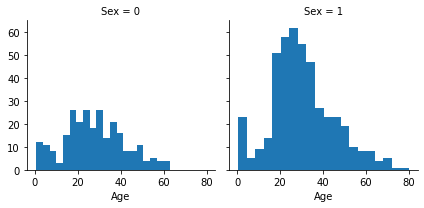

In [23]:
g = sns.FacetGrid(new_data,col= "Sex")
g.map(plt.hist,"Age", bins= 20)

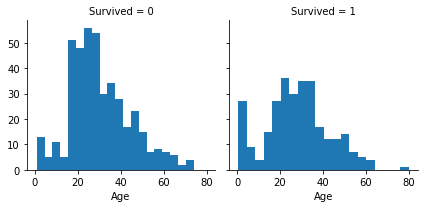

In [24]:
g = sns.FacetGrid(new_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

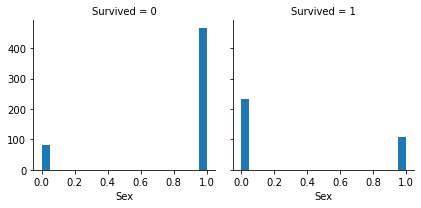

In [25]:
g = sns.FacetGrid(new_data, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

In [26]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    

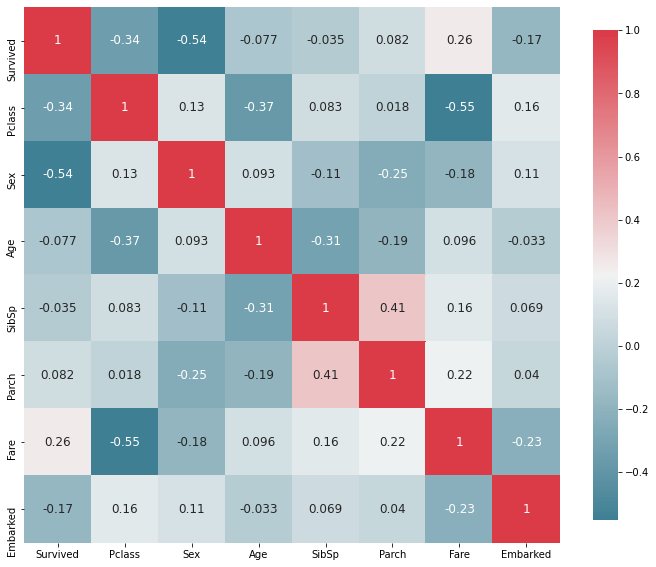

In [27]:
plot_correlation_map(new_data)

In [28]:
new_data[['Pclass', 'Survived']].groupby('Pclass').mean() 

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survival Probability'>

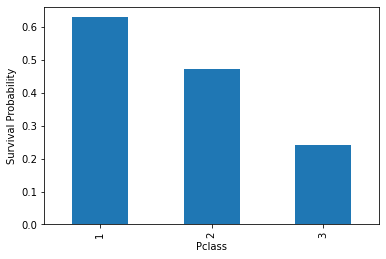

In [29]:
plt.xlabel("Pclass")
plt.ylabel("Survival Probability")
vc6 = new_data[["Pclass" , "Survived"]].groupby("Pclass").mean()
vc6.Survived.plot.bar()

In [30]:
new_data['Title'] = new_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
new_data1 = new_data.drop(columns='Name')
new_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,G6,2.0,Mr
1,1,1,0,38.0,1,0,71.2833,C85,0.0,Mrs
2,1,3,0,26.0,0,0,7.9250,G6,2.0,Miss
3,1,1,0,35.0,1,0,53.1000,C123,2.0,Mrs
4,0,3,1,35.0,0,0,8.0500,G6,2.0,Mr


In [31]:
new_data1['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Ms            1
Mme           1
Jonkheer      1
Don           1
Capt          1
Lady          1
Sir           1
Name: Title, dtype: int64

<AxesSubplot:>

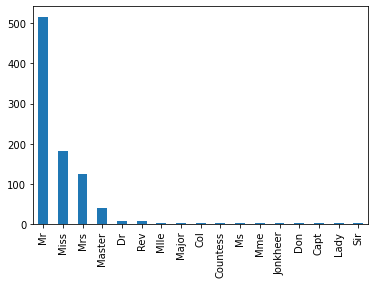

In [32]:
vc8 = new_data.Title.value_counts()
vc8.plot.bar()

In [33]:
new_data['Title'] = new_data['Title'].replace({

                    "Capt":"Officer",

                    "Col": "Officer",

                    "Major":"Officer",

                      "Dr":"Officer",

                    "Jonkheer":"Royalty",

                    "Don":"Royalty",

                    "Sir" :"Royalty",

                   "Lady" :"Royalty",

                  "the Countess": "Royalty",

                    "Mme": "Miss",

                    "Mlle": "Miss",

                    "Miss" : "Miss",

                    "Ms": "Mrs",

                    "Mr" : "Mrs",

                    "Mrs" : "Mrs",

                    "Master" : "Master"

                    })

In [34]:
new_data["Title"].value_counts()


Mrs         643
Miss        185
Master       40
Officer      12
Rev           6
Royalty       4
Countess      1
Name: Title, dtype: int64

In [35]:
new_data["Title"] = new_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Officer':4 , 'Royalty':5 })
new_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,G6,2.0,3.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0.0,3.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,G6,2.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2.0,3.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,G6,2.0,3.0


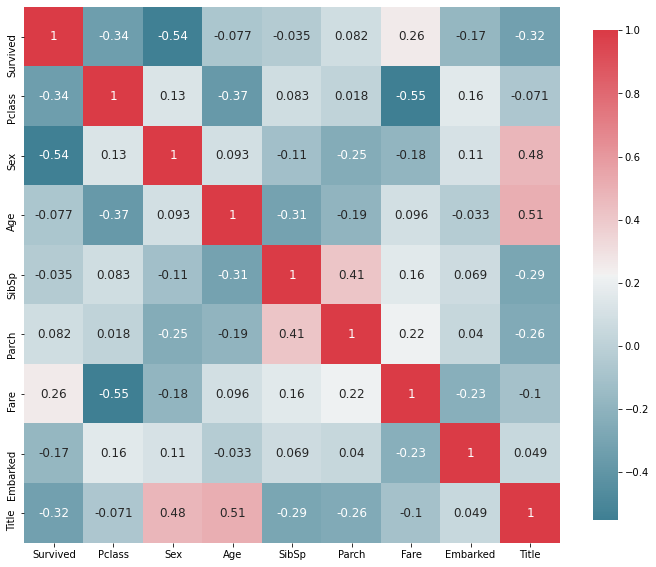

In [36]:
plot_correlation_map(new_data)

## create a new feature

In [37]:
new_data['FamilySize'] = new_data['SibSp'] + new_data['Parch'] + 1
new_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,G6,2.0,3.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0.0,3.0,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,G6,2.0,1.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2.0,3.0,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,G6,2.0,3.0,1


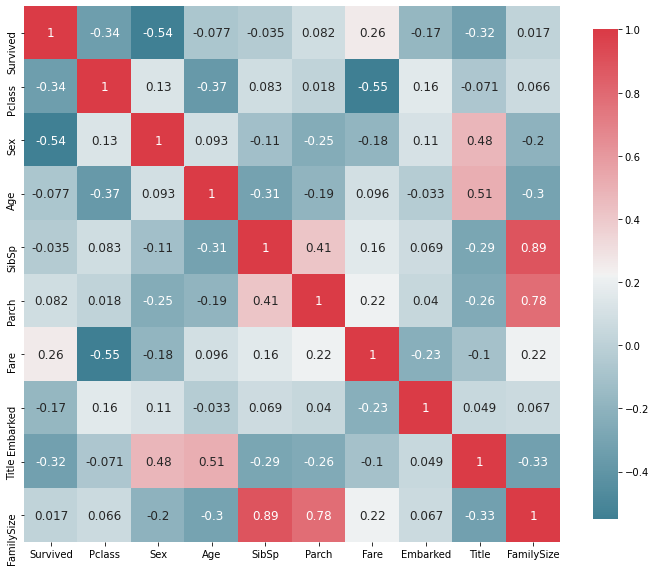

In [38]:
plot_correlation_map(new_data)

# checkpoint Logistic Regression :

In [39]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [40]:
#features extraction
x = new_data[['Sex', 'FamilySize']]
y = new_data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.78


### confusion matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

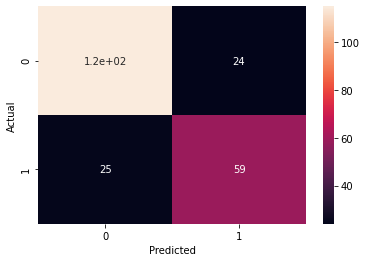

In [41]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


### matrix for classification is ROC / AUC

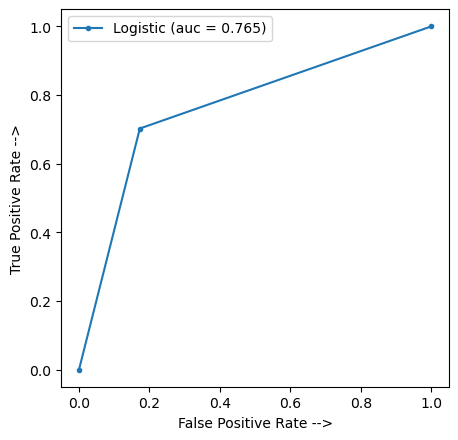

In [45]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()